In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import  StandardScaler


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [194]:
data=pd.read_csv("titanic.csv")

In [195]:
data

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [196]:
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [197]:
data.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

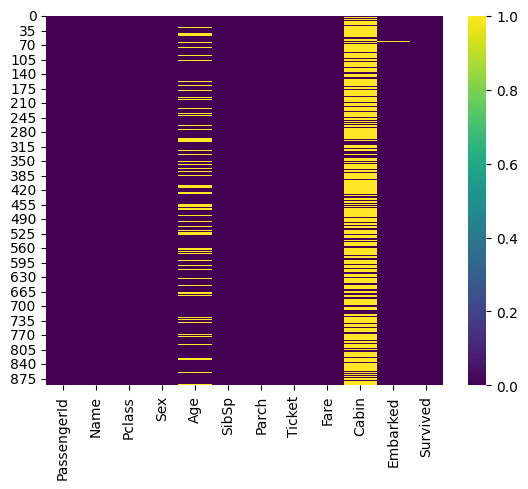

In [198]:
sns.heatmap(data.isnull(), cbar=True, cmap='viridis')
plt.show()

In [199]:
data=data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [200]:
data.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [201]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [202]:
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

In [203]:
data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

In [204]:
data["Age"]=data["Age"].round().astype(int)

In [205]:
data["Sex"]=data["Sex"].map({'male':0,'female':1})

In [206]:
data["Embarked"]=data["Embarked"].map({'S':0,'C':1,'Q':2})

In [207]:
data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [208]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22,1,0,7.2500,0,0
1,1,1,38,1,0,71.2833,1,1
2,3,1,26,0,0,7.9250,0,1
3,1,1,35,1,0,53.1000,0,1
4,3,0,35,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,0,0
887,1,1,19,0,0,30.0000,0,1
888,3,1,30,1,2,23.4500,0,0
889,1,0,26,0,0,30.0000,1,1


In [209]:
survival_counts = data['Survived'].value_counts()
proportions = survival_counts / survival_counts.sum()
print(survival_counts)
print(proportions)

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: count, dtype: float64


In [210]:
not_survived = data[data['Survived'] == 0]
survived = data[data['Survived'] == 1]
survived_oversampled = resample(survived,replace=True,n_samples=549,random_state=42)  
data_balanced = pd.concat([not_survived, survived_oversampled])
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [211]:
data_balanced

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,30,0,0,7.8958,0,0
1,1,1,52,1,1,93.5000,0,1
2,3,0,30,0,0,8.0500,0,0
3,2,1,2,1,1,26.0000,0,1
4,3,1,30,2,0,23.2500,2,1
...,...,...,...,...,...,...,...,...
1093,3,0,16,0,0,7.7750,0,0
1094,3,1,30,8,2,69.5500,0,0
1095,1,1,35,0,0,512.3292,1,1
1096,1,1,24,0,0,69.3000,1,1


In [212]:
X=data_balanced.drop("Survived",axis=1)
y=data_balanced['Survived']

In [213]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=2546)

In [214]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

__Logistic Regression___________________________________________ 

In [216]:
lgmodel=LogisticRegression()


In [217]:
lgmodel.fit(X_train,y_train)

LogisticRegression()

In [218]:
y_pred=lgmodel.predict(X_test)

In [219]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [220]:
lgaccuracy=accuracy_score(y_test,y_pred)
lgcm=confusion_matrix(y_test,y_pred)
lgcr=classification_report(y_test,y_pred)

print(lgaccuracy)
print(lgcm)
print(lgcr)

0.8272727272727273
[[93 13]
 [25 89]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.87      0.78      0.82       114

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



__Decision Tree___________________________________

In [222]:

dt=DecisionTreeClassifier(max_depth=3)

In [223]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 0.202\ngini = 0.5\nsamples = 878\nvalue = [443, 435]'),
 Text(0.25, 0.625, 'x[5] <= -0.169\ngini = 0.408\nsamples = 526\nvalue = [376, 150]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= -1.521\ngini = 0.308\nsamples = 358\nvalue = [290, 68]'),
 Text(0.0625, 0.125, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 346\nvalue = [289, 57]'),
 Text(0.375, 0.375, 'x[3] <= 2.159\ngini = 0.5\nsamples = 168\nvalue = [86, 82]'),
 Text(0.3125, 0.125, 'gini = 0.498\nsamples = 149\nvalue = [70, 79]'),
 Text(0.4375, 0.125, 'gini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(0.75, 0.625, 'x[0] <= 0.282\ngini = 0.308\nsamples = 352\nvalue = [67, 285]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= -2.112\ngini = 0.071\nsamples = 190\nvalue = [7.0, 183.0]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6875, 0.125, 'gini = 0.062\nsamples = 187\nvalue = [6.0, 181.0]'),
 

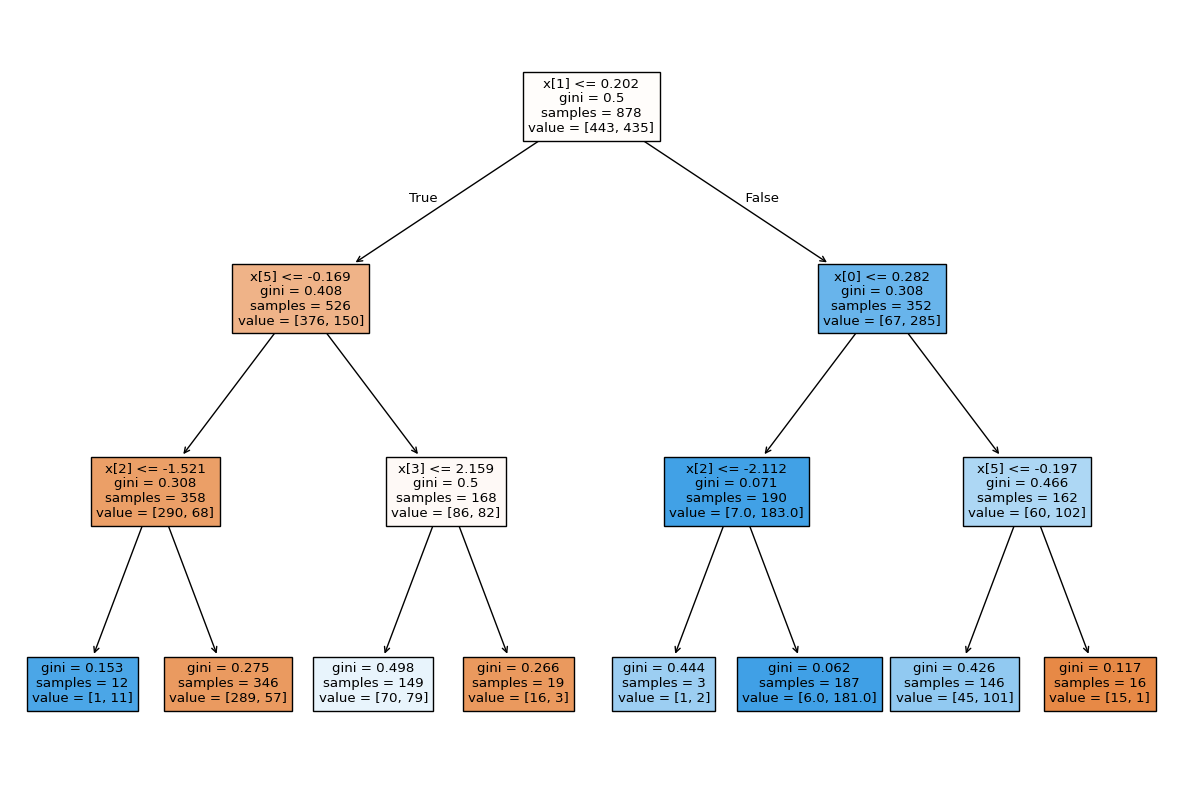

In [224]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [225]:
y_pred=dt.predict(X_test)

In [226]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [227]:
dtaccuracy=accuracy_score(y_test,y_pred)
dtcm=confusion_matrix(y_test,y_pred)
dtcr=classification_report(y_test,y_pred)

print(dtaccuracy)
print(dtcm)
print(dtcr)

0.8272727272727273
[[83 23]
 [15 99]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       106
           1       0.81      0.87      0.84       114

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



__Random Forest______________________________________________

In [229]:
rf=RandomForestClassifier(n_estimators=100, random_state=2546)

In [230]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2546)

In [231]:
y_pred=rf.predict(X_test)

In [232]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [233]:
rf_accuracy=accuracy_score(y_test,y_pred)
rf_cm=confusion_matrix(y_test,y_pred)
rf_cr=classification_report(y_test,y_pred)

print(rf_accuracy)
print(rf_cm)
print(rf_cr)

0.9272727272727272
[[ 94  12]
 [  4 110]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       106
           1       0.90      0.96      0.93       114

    accuracy                           0.93       220
   macro avg       0.93      0.93      0.93       220
weighted avg       0.93      0.93      0.93       220



__K Nearest Neighbor_________________________________________

In [235]:
knn = KNeighborsClassifier(n_neighbors=5)

In [236]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [237]:
y_pred=knn.predict(X_test)

In [238]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [239]:
k_accuracy=accuracy_score(y_test,y_pred)
k_cm=confusion_matrix(y_test,y_pred)
k_cr=classification_report(y_test,y_pred)

print(k_accuracy)
print(k_cm)
print(k_cr)

0.8727272727272727
[[ 92  14]
 [ 14 100]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       106
           1       0.88      0.88      0.88       114

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



__Naive Bayes____________________________________________

In [241]:
nb=GaussianNB()

In [242]:
nb.fit(X_train,y_train)

GaussianNB()

In [243]:
y_pred=nb.predict(X_test)

In [244]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [245]:
nb_accuracy=accuracy_score(y_test,y_pred)
nb_cm=confusion_matrix(y_test,y_pred)
nb_cr=classification_report(y_test,y_pred)

print(nb_accuracy)
print(nb_cm)
print(nb_cr)

0.8045454545454546
[[91 15]
 [28 86]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       106
           1       0.85      0.75      0.80       114

    accuracy                           0.80       220
   macro avg       0.81      0.81      0.80       220
weighted avg       0.81      0.80      0.80       220



__AdaBoost__________________________________________

In [247]:
adbst=AdaBoostClassifier(n_estimators=50,learning_rate=0.3,random_state=2546)

In [248]:
import warnings
warnings.filterwarnings('ignore')

In [249]:
adbst.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.3, random_state=2546)

In [250]:
y_pred=adbst.predict(X_test)

In [251]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [252]:
adbst_accuracy=accuracy_score(y_test,y_pred)
adbst_cm=confusion_matrix(y_test,y_pred)
adbst_cr=classification_report(y_test,y_pred)

print(adbst_accuracy)
print(adbst_cm)
print(adbst_cr)

0.8
[[86 20]
 [24 90]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       106
           1       0.82      0.79      0.80       114

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220



__Gradient Boost__________________________________________________

In [254]:
gbst=GradientBoostingClassifier(n_estimators=43,learning_rate=0.3,random_state=2546)

In [255]:
gbst.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=43,
                           random_state=2546)

In [256]:
y_pred=gbst.predict(X_test)

In [257]:
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [258]:
gbst_accuracy=accuracy_score(y_test,y_pred)
gbst_cm=confusion_matrix(y_test,y_pred)
gbst_cr=classification_report(y_test,y_pred)

print(gbst_accuracy)
print(gbst_cm)
print(gbst_cr)

0.8772727272727273
[[ 92  14]
 [ 13 101]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       106
           1       0.88      0.89      0.88       114

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



__Support Vector Machine___________________________________

In [260]:
svc=SVC()

In [261]:
svc.fit(X_train,y_train)

SVC()

In [262]:
y_pred=svc.predict(X_test)

In [263]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [264]:
svc_accuracy=accuracy_score(y_test,y_pred)
svc_cm=confusion_matrix(y_test,y_pred)
svc_cr=classification_report(y_test,y_pred)

print(svc_accuracy)
print(svc_cm)
print(svc_cr)

0.8363636363636363
[[94 12]
 [24 90]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.88      0.79      0.83       114

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220



__SCORES__

__Random Forest is  the best fitting alogrithm for titanic.csv dataset__